<h1>Handwritten digits classification (MNIST dataset)</h1>
<h2>Convolutional Neural Network (CNN)</h2>

<b>Loading libraries</b>

In [1]:
# Remove the known problem in h5py library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
import numpy as np
import math
from matplotlib import pyplot as plt
from keras.models import load_model

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

C:\Users\arnis\Anaconda2\envs\py3k\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<b>Loading MNIST dataset and print its size (60000 trainig + 10000 testing data)</b>

In [2]:
mnist = fetch_mldata('MNIST original')
images = mnist.data
labels = mnist.target
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print ('MNIST training data size: %s' % len(X_train))
print ('MNIST testing data size: %s' % len(X_test))

X_test_v = X_test

MNIST training data size: 56000
MNIST testing data size: 14000


<b>Print some sample images from dataset</b>

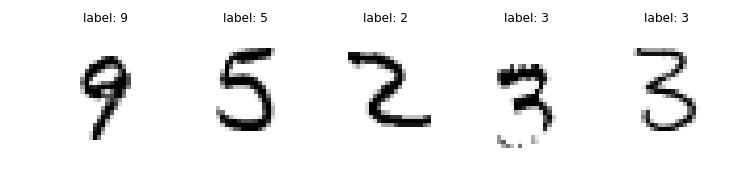

In [3]:
# Print 5 random images from dataset for demonstartion
images = X_train
labels = y_train
random_idx = np.random.choice(images.shape[0], 5)
images_and_labels = list(zip(images[random_idx], labels[random_idx]))

img = plt.figure(1, figsize=(7, 7), dpi=125)
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(1, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %s' % int(label), fontsize = 7)
plt.show()

<b>Prepare data</b>

In [4]:
# Transform MNIST dataset from a (60000, 28, 28) shape to (600000, 1, 28, 28) -
# - (n, depth, width, height)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Values are in the range 0-255, scale values to 0-1 by dividing on float number 255.0
X_train = X_train/255.0
X_test = X_test/255.0

<b>Convert labels to 10-dimensional class matrices</b>

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


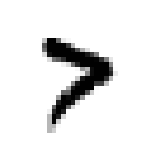

In [5]:
# Define 10 classes for 0-9 digits, ex. [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] represent digit 5
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Print example, a first sample from the dataset
print(Y_train[0])
img = plt.figure(1, figsize=(7, 7), dpi=25)
plt.axis('off')
plt.imshow(X_train[0].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

<b>Define a classifier model, layers and parameters</b>

In [6]:
cnn_clf = Sequential()
# Number of filters - 32, Filter size - (3x3), activation function "relu", width - 28, height - 28, depth - 1
cnn_clf.add(Conv2D(32, 4, activation='relu', padding='same', input_shape=(28,28,1)))
cnn_clf.add(Conv2D(32, 3, activation='relu', padding='same'))
cnn_clf.add(MaxPooling2D(pool_size=(2,2)))
cnn_clf.add(Conv2D(64, 3, activation='relu', padding='same'))
cnn_clf.add(MaxPooling2D(pool_size=(2,2)))
cnn_clf.add(Flatten())
cnn_clf.add(Dense(512, activation='relu'))
cnn_clf.add(Dropout(0.5))
cnn_clf.add(Dense(10, activation='softmax'))

<b>Complile the model</b>

In [7]:
cnn_clf.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b>Train the model</b>

In [8]:
%%time

cnn_clf.fit(X_train, Y_train, batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
56000/56000 [==============================] - 143s 3ms/step - loss: 0.1252 - acc: 0.9607
Epoch 2/10
56000/56000 [==============================] - 143s 3ms/step - loss: 0.0462 - acc: 0.9856
Epoch 3/10
56000/56000 [==============================] - 143s 3ms/step - loss: 0.0326 - acc: 0.9898
Epoch 4/10
56000/56000 [==============================] - 143s 3ms/step - loss: 0.0261 - acc: 0.9916
Epoch 5/10
56000/56000 [==============================] - 144s 3ms/step - loss: 0.0217 - acc: 0.9932
Epoch 6/10
56000/56000 [==============================] - 145s 3ms/step - loss: 0.0190 - acc: 0.9941
Epoch 7/10
56000/56000 [==============================] - 145s 3ms/step - loss: 0.0160 - acc: 0.9950
Epoch 8/10
56000/56000 [==============================] - 146s 3ms/step - loss: 0.0143 - acc: 0.9958
Epoch 9/10
56000/56000 [==============================] - 146s 3ms/step - loss: 0.0126 - acc: 0.9961
Epoch 10/10
56000/56000 [==============================] - 146s 3ms/step - loss: 0.0127 - a

<b>Save classifier model</b>

In [9]:
#cnn_clf.save('cnn_clf.h5')
#del cnn_clf
#cnn_clf = load_model('cnn_clf.h5')

<b>Test the model and print results</b>

In [10]:
score = cnn_clf.evaluate(X_test, Y_test)
print('Loss: %s \nAccuracy: %s' % (score[0], score[1]))
miscl = np.nonzero(cnn_clf.predict_classes(X_test).reshape((-1,)) != y_test)
to_list = list(miscl)
print (len(to_list[0]))

14000/14000 [==============================] - 9s 635us/step
Loss: 0.03583664222744057 
Accuracy: 0.993
98


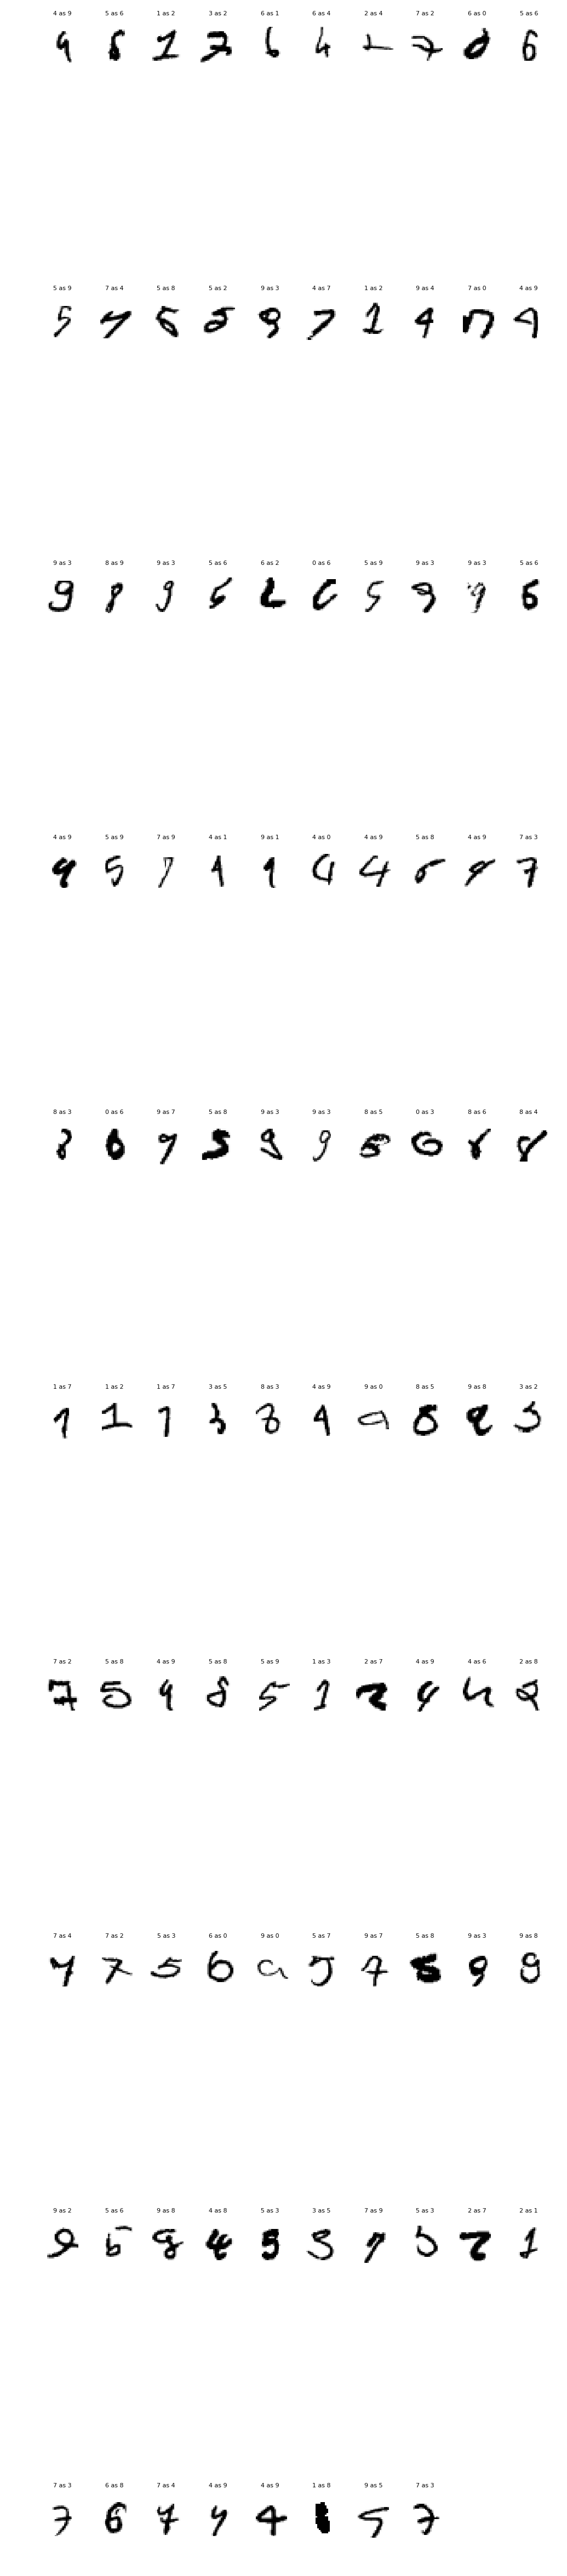

In [11]:
predictions = cnn_clf.predict_classes(X_test).reshape((-1,))
miscl_images_and_labels = list(zip(X_test[miscl], y_test[miscl], predictions[miscl]))
img = plt.figure(1, figsize=(6, 36), dpi=200)
for index, (image, label, miscl_label) in enumerate(miscl_images_and_labels):
    plt.subplot(math.ceil(len(miscl_images_and_labels)/9), 10, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%s as %s' % (int(label), int(miscl_label)), fontsize = 4)
plt.show()